## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## 1. Reading data

In [3]:
data = pd.read_csv("../datasets/cakes.csv")
data

,flour,eggs,sugar,milk,butter,baking_powder,type
0,181.33,1,1200.00,270.0,283.75,5.62,cupcake
1,136.00,2,1000.00,80.0,113.50,1.87,cupcake
2,136.00,3,775.00,30.0,283.75,7.50,cupcake
3,204.00,2,1000.00,120.0,340.50,6.56,cupcake
4,181.33,2,825.00,45.0,227.00,0.94,cupcake
...,...,...,...,...,...,...,...
94,136.00,2,133.33,120.0,113.50,3.75,muffin
95,204.00,1,150.00,60.0,113.50,3.75,muffin
96,408.00,2,200.00,120.0,113.50,11.25,muffin
97,170.00,1,150.00,180.0,56.75,4.69,muffin


## 2. First five rows in table

In [4]:
data.head()

,flour,eggs,sugar,milk,butter,baking_powder,type
0,181.33,1,1200.0,270.0,283.75,5.62,cupcake
1,136.00,2,1000.0,80.0,113.50,1.87,cupcake
2,136.00,3,775.0,30.0,283.75,7.50,cupcake
3,204.00,2,1000.0,120.0,340.50,6.56,cupcake
4,181.33,2,825.0,45.0,227.00,0.94,cupcake


## 3. Data info and details

In [5]:
data.info()
data.describe()
# data.describe(include=[object])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   flour          99 non-null     float64
 1   eggs           99 non-null     int64  
 2   sugar          99 non-null     float64
 3   milk           99 non-null     float64
 4   butter         99 non-null     float64
 5   baking_powder  99 non-null     float64
 6   type           99 non-null     object 
dtypes: float64(5), int64(1), object(1)
memory usage: 5.5+ KB


,flour,eggs,sugar,milk,butter,baking_powder
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,253.626061,2.090909,384.175152,172.777778,123.627778,6.731919
std,100.484020,1.262415,290.546311,97.193323,71.743135,3.325731
min,110.500000,1.000000,50.000000,10.000000,14.190000,0.940000
25%,204.000000,1.000000,170.835000,120.000000,75.670000,3.750000
50%,249.330000,2.000000,300.000000,180.000000,113.500000,7.500000
75%,272.000000,2.000000,500.000000,240.000000,151.330000,7.500000
max,816.000000,8.000000,1300.000000,720.000000,340.500000,15.000000


## 4. Filling null values

In [6]:
for column in data.columns:
    if data[column].isnull().any():
        data[column] = data[column].fillna(data[column].mode()[0])  # fill with most common value

## 5. Correlational matrix

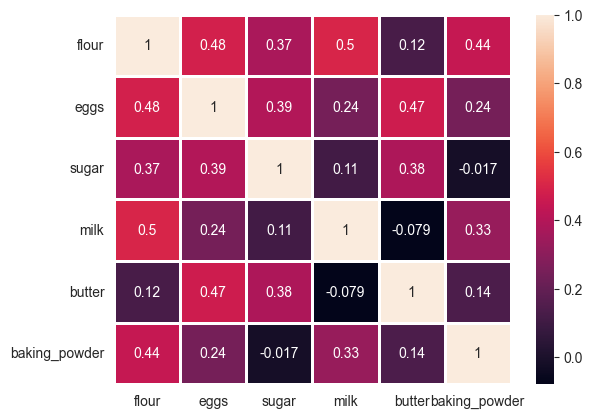

In [7]:
sb.heatmap(
    data=data.corr(numeric_only=True),
    annot=True,
    linewidths=2
)
plt.show()

## 6. Scatter matrix

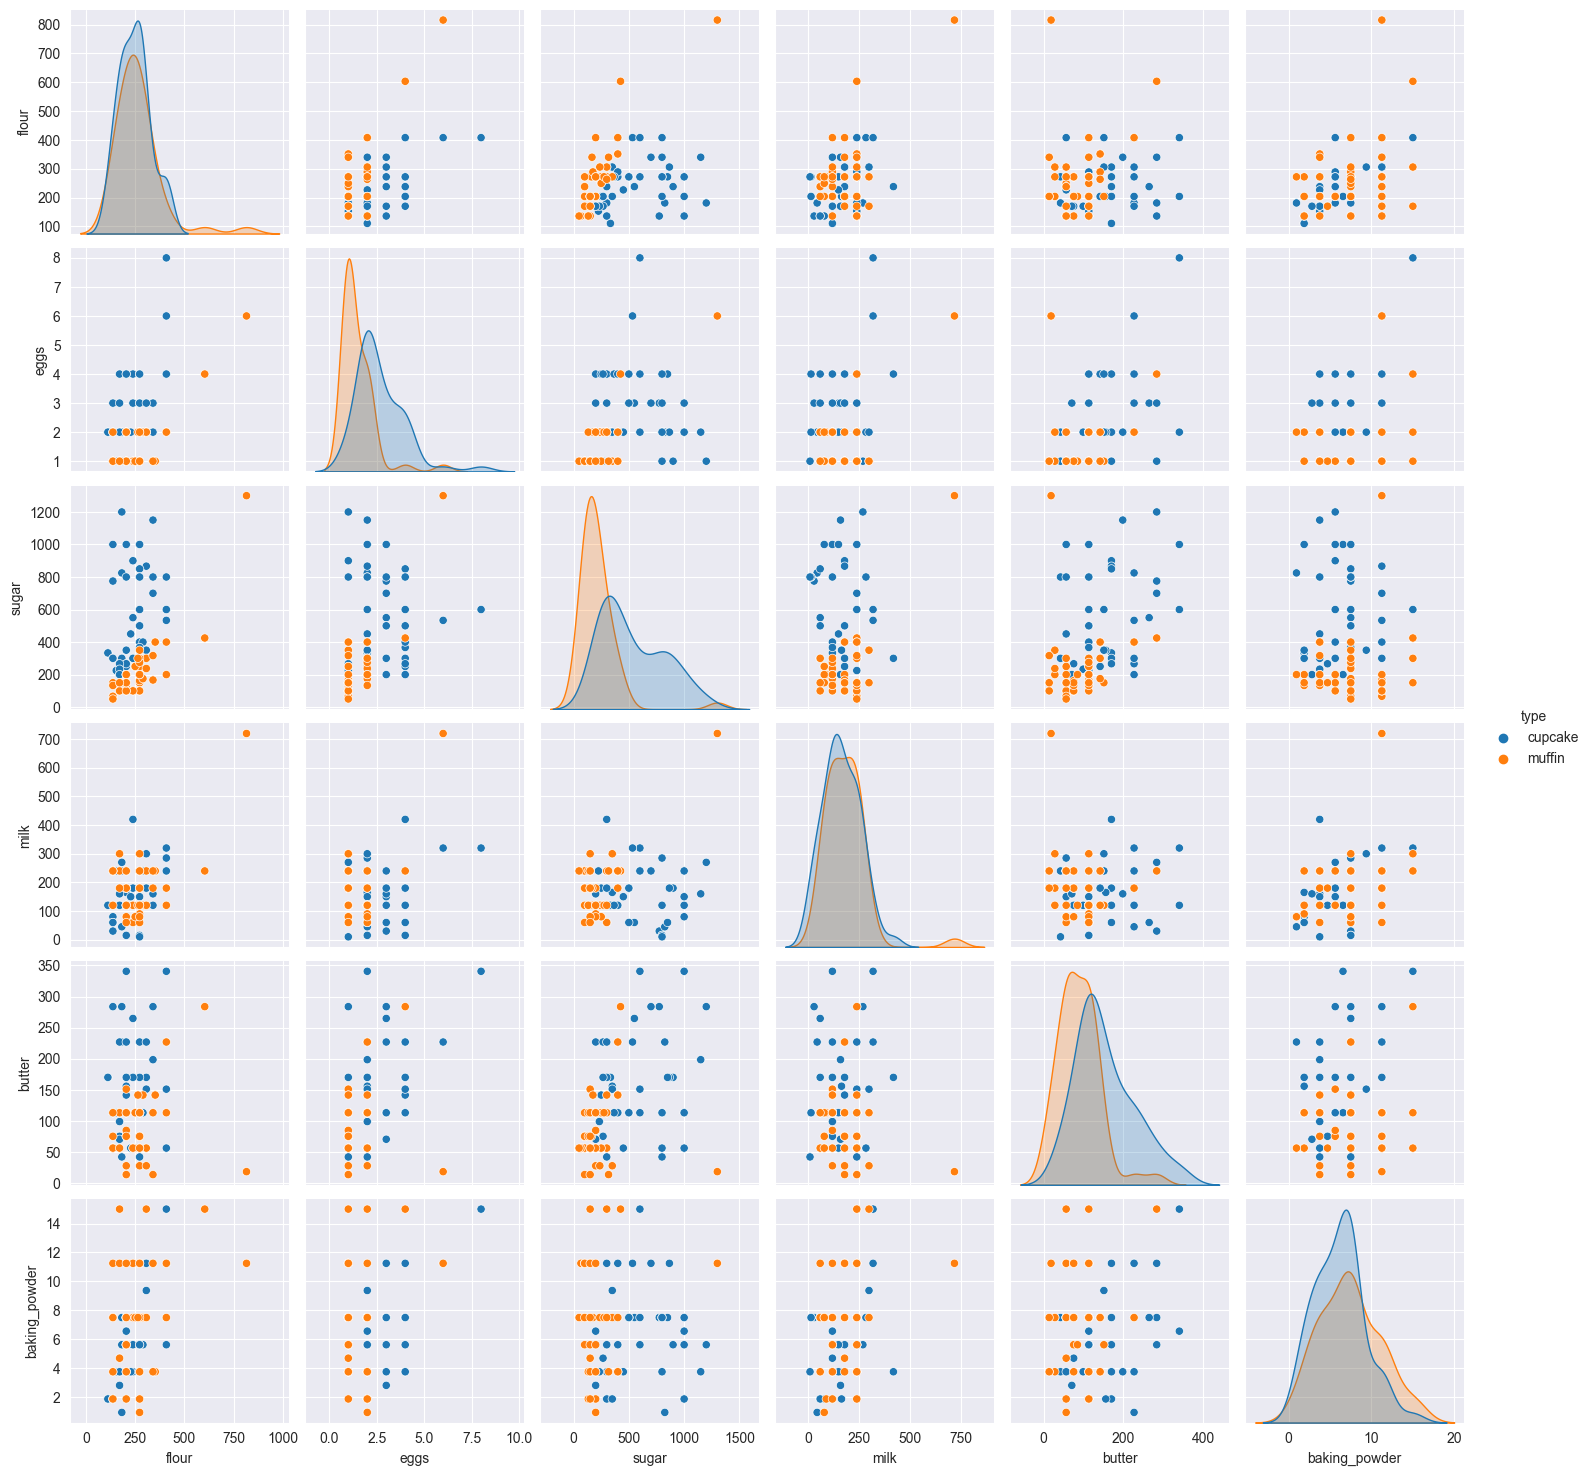

In [8]:
sb.pairplot(data=data, hue='type')

## 7. Bar chart

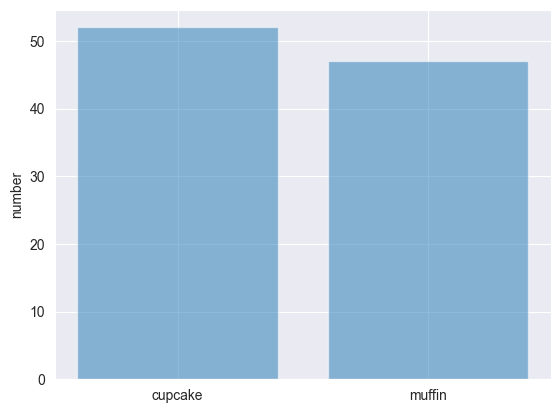

In [9]:
values = data['type'].value_counts()
y_pos = np.arange(len(values.values))
plt.bar(y_pos, values.values, align='center', alpha=0.5)
plt.xticks(y_pos, values.index)
plt.ylabel('number')
plt.show()

## 8. Scaling input

In [10]:
input_parameters = [
    'flour', 'eggs', 'sugar', 'milk', 'butter', 'baking_powder'
]

sc = StandardScaler()
data[input_parameters] = pd.DataFrame(
    data=sc.fit_transform(data.loc[:, input_parameters]),
    columns=input_parameters)
data

,flour,eggs,sugar,milk,butter,baking_powder,type
0,-0.723140,-0.868542,2.822189,1.005388,2.243240,-0.336040,cupcake
1,-1.176552,-0.072379,2.130328,-0.959427,-0.141886,-1.469350,cupcake
2,-1.176552,0.723785,1.351983,-1.476484,2.243240,0.232126,cupcake
3,-0.496384,-0.072379,2.130328,-0.545782,3.038282,-0.051957,cupcake
4,-0.723140,-0.072379,1.524949,-1.321367,1.448198,-1.750411,cupcake
...,...,...,...,...,...,...,...
94,-1.176552,-0.072379,-0.867751,-0.545782,-0.141886,-0.901184,muffin
95,-0.496384,-0.868542,-0.810084,-1.166250,-0.141886,-0.901184,muffin
96,1.544122,-0.072379,-0.637119,-0.545782,-0.141886,1.365436,muffin
97,-0.836468,-0.868542,-0.810084,0.074686,-0.936928,-0.617101,muffin


## 9. Training and test sets

In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    data[input_parameters], data['type'], train_size=0.7, random_state=0
)

## 10. K-NN algorithm

In [12]:
k = int(np.sqrt(data.shape[0]))

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

prediction = knn.predict(x_test)
print("Score [RIGHT]: {:.2f} %".format(accuracy_score(y_test, prediction) * 100))

Score [RIGHT]: 86.67 %
